# Intro to Neural Networks Assignment

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

* **Input Layer:** the data table/matrix passed into the model
* **Hidden Layer:** an intermediate representation of the input data following some manipulation/transformation
* **Output Layer:** the resultant vector of data, like a prediction, often modified by an activation function to suit the problem at hand
* **Neuron:** the base component of a neural network. Neurons receive input data, multplies each of them by a weight, sums those products, and passes that sum through an "activation function", the result of which is the final value
* **Weight:** a matrix of values by which the features of the input data are scaled. In a linear model, this represents the slope.
* **Activation Function:** a manipulation by which the final decision/prediction/fit is made. For example, a simple threshold that must be met in a classification problem transforms the output to a 0 or 1.
* **Node Map:** a visual representation of a neural network.
* **Perceptron:** the simplest neural network, composed of a single neuron/node.

## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

Input data (a matrix) is passed to a layer (a set) of nodes which each apply weights (multiplication), bias (addition), and some activation function. The nodes then output that data to the next layer of nodes, until finally the output data is returned.

## Write your own perceptron code that can correctly classify a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [13]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

class Perceptron(object):
    def __init__(self, rate = 0.1, n_iter = 10):
        self.rate = rate
        self.n_iter = n_iter
        
    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1] + 1)
        self.errors = []
        
        for i in range(self.n_iter):
            err = 0
            for x_i, y_i in zip(X, y):
                delta_w = self.rate * (y_i - self.predict(x_i))
                self.weights[0] += delta_w
                self.weights[1:] += delta_w * x_i
                err += int(delta_w != 0.0)
            self.errors.append(err)
            
        return self
    
    def predict(self, X):
        net_input = np.dot(X, self.weights[1:]) + self.weights[0]
        return np.where(net_input >= 0.0, 1, -1)

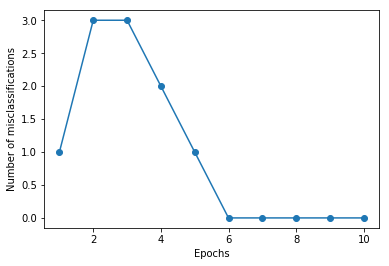

In [38]:
df = pd.DataFrame({
    'x1':[0, 1, 0, 1],
    'x2':[0, 0, 1, 1],
    'y': [1, 1, 1, 0]
})

X = df[['x1', 'x2']].values
y = df['y'] * 2 - 1
pn = Perceptron()
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

## Implement your own Perceptron Class and use it to classify a binary dataset like: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 
- [Titanic](https://raw.githubusercontent.com/ryanleeallred/datasets/master/titanic.csv)
- [A two-class version of the Iris dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Iris.csv)

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

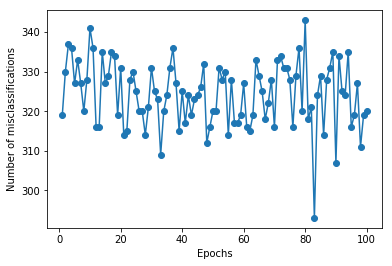

In [36]:
df = pd.read_csv('https://raw.githubusercontent.com/'
                 'ryanleeallred/datasets/master/'
                 'diabetes.csv')

target = 'Outcome'
X = df.drop(columns=target).values
y = df[target] * 2 - 1
pn = Perceptron(rate=0.1, n_iter=100)
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?